# DeepTile Demo

## Imports

In [1]:
import deeptile
import matplotlib
import matplotlib.pyplot as plt
from deeptile import lift
from deeptile.extensions import stitch
from skimage import filters, measure
matplotlib.rcParams['figure.dpi'] = 300

## Example: Lifting a Custom Function

In [2]:
# Define a simple nuclei segmentation algorithm and lift for tile processing using the @lift decorator
@lift
def segment_nuclei(tile):
    
    threshold = filters.threshold_otsu(tile)
    mask = tile > threshold
    mask = measure.label(mask)
    
    return mask

In [3]:
# Create DeepTile object
dt = deeptile.load('../data/sample.tif', dask=False)

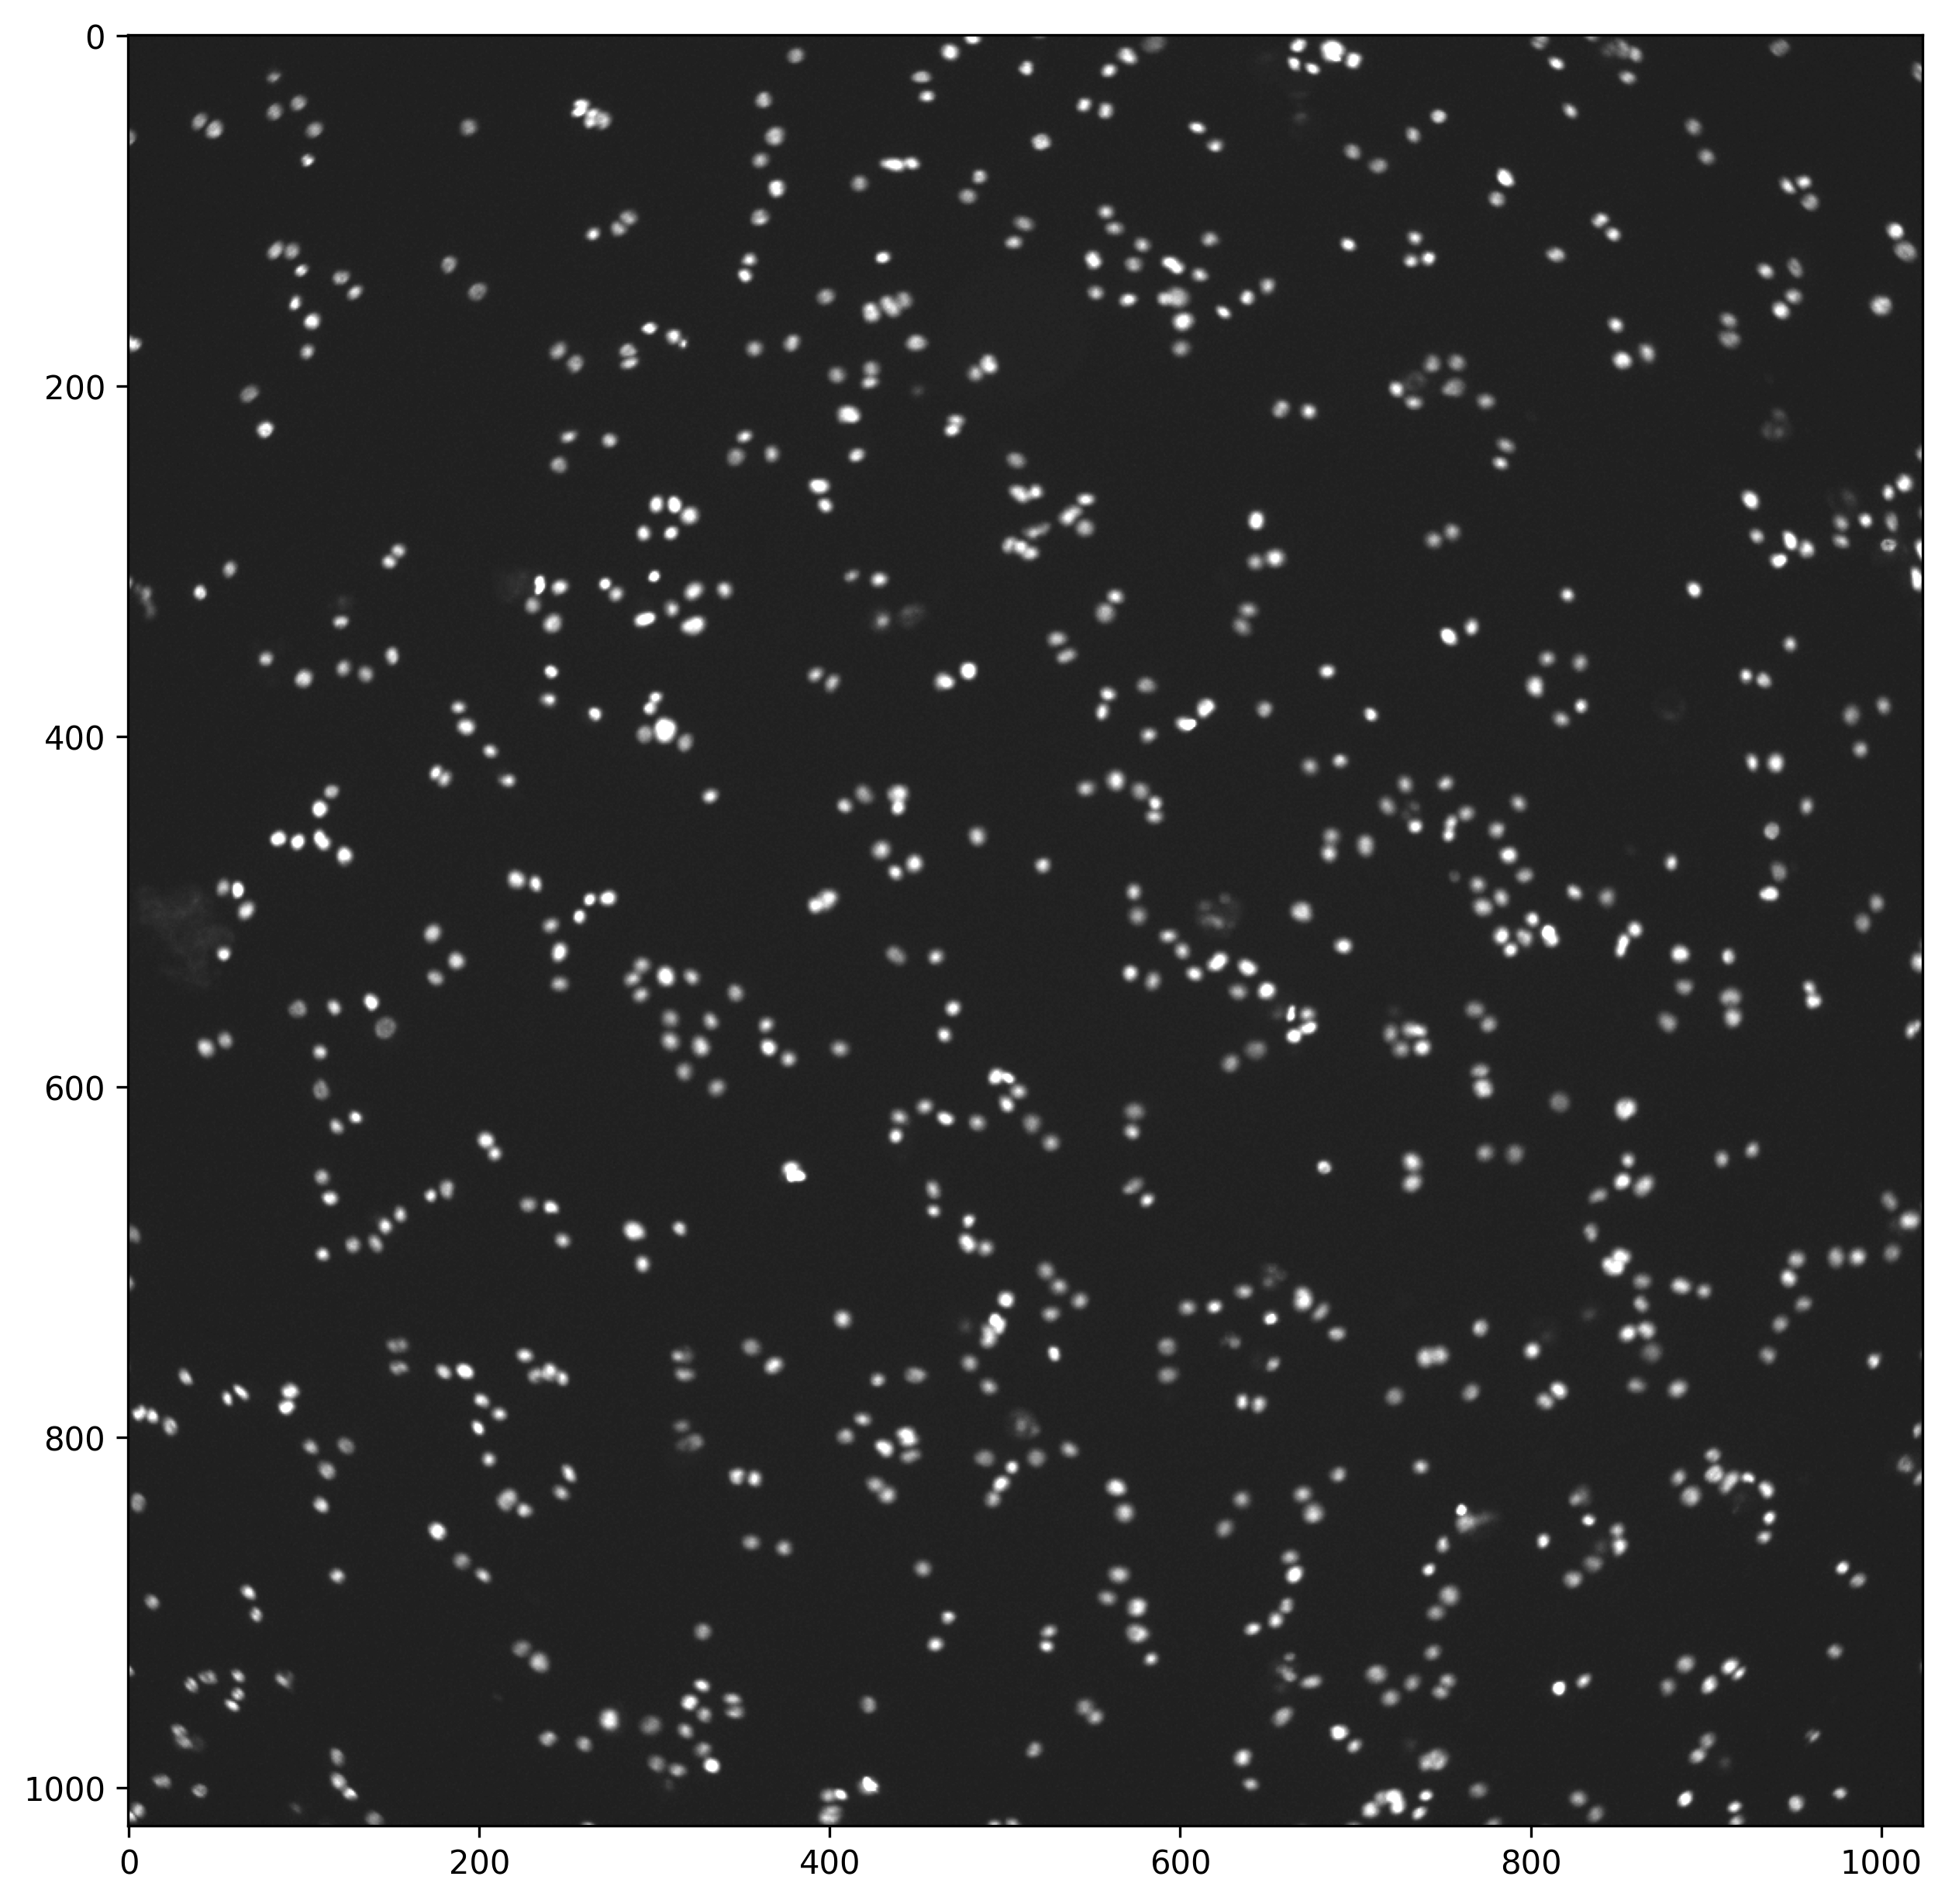

In [4]:
# Show the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(dt.image, vmin=0, vmax=4000, cmap='gray')

In [5]:
# Configure
tile_size = (300, 300)
overlap = (0.1, 0.1)

In [6]:
# Get tiles
tiles = dt.get_tiles(tile_size, overlap)

In [7]:
# Segment tiles and stitch
masks = segment_nuclei(tiles)
mask = stitch.stitch_masks(masks)

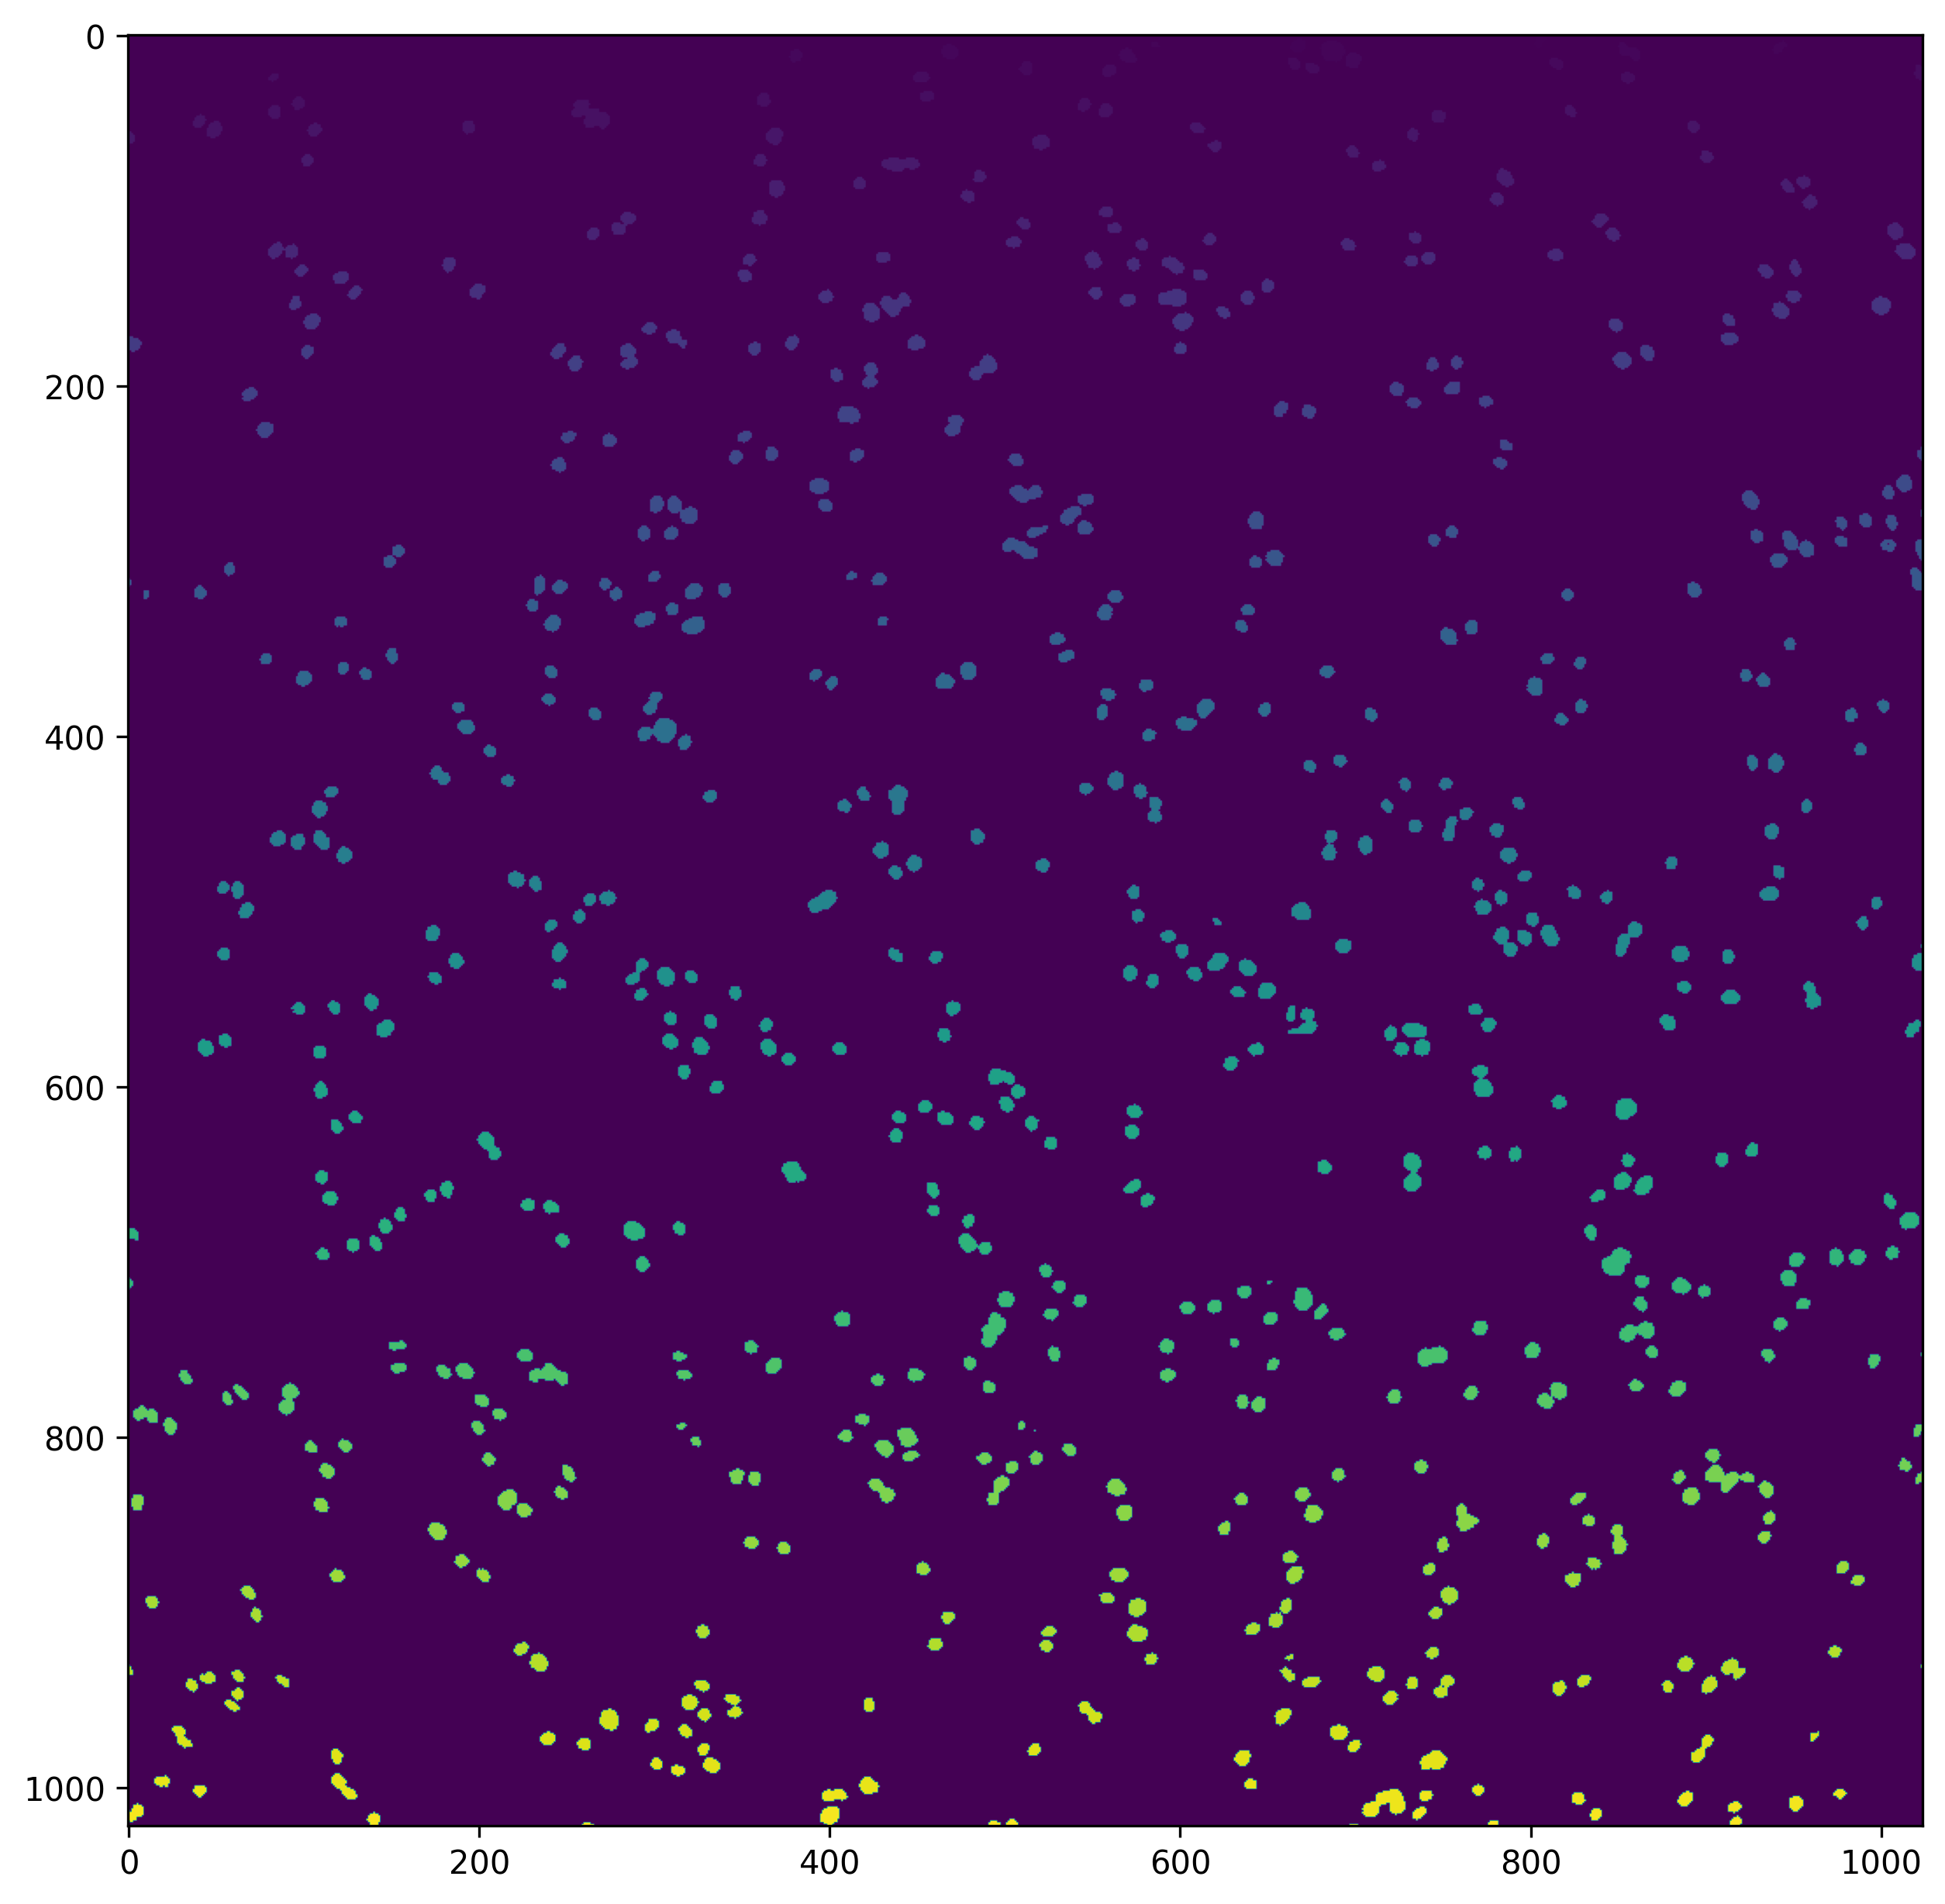

In [8]:
# Show the stitched mask
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mask)